In [44]:
%matplotlib nbagg

import matplotlib.pyplot as plt
import numpy as np
import scipy.io
from scipy import misc
from filesSelector import *
from skimage import io
from scipy.misc import imresize
from scipy import signal
import exifread
import os
import json


In [40]:
def get_points(file_path):
    points = []
    # assuming i get 4 points for dna spot (rects)
    p = np.zeros((2))
    p_av=np.zeros((2))
    with open(file_path,'r') as f:
        lines = f.readlines()
        for i,line in enumerate(lines):
            l = line.split(',')
            p[:] = np.array([float(l[0])*scale,float(l[1])*scale])-marker_pos[:]
            if minus_abs_y:
                p[1] = -np.abs(p[1])
            if abs_y:
                p[1] = np.abs(p[1])
            p_av[:] = p_av[:]+ p[:]/4
            if all_points:
                points.append(p)
                p=p = np.zeros((2))
            if center_rect and ((i+1)%4 ==0) : 
                points.append(p_av)
                p_av=np.zeros((2))
    print ('extracted points: '+ str(len(points)))
    return points
        

def array(pos0,d,n):
    for nx in range(n[0]):
        for ny in range(n[1]):
            points.append([pos0[0]+nx*d[0],pos0[1]+ny*d[1]])
            
def add_point(file,pos):
    file.write('    <point>\n')
    file.write('        <x>'+str(int(pos[0]))+'</x>\n')
    file.write('        <y>'+str(int(pos[1]))+'</y>\n')
    file.write('        <z>0</z>\n')
    file.write('        <solution>'+solution+'</solution>\n')
    file.write('        <duration>'+duration+'</duration>\n')
    file.write('    </point>\n')

def header(file):
    file.write('<?xml version="1.0" encoding="utf-8" standalone="no"?>\n')
    file.write('<pattern>\n')
    file.write('    <xmultiplier>1.00</xmultiplier>\n')
    file.write('    <ymultiplier>1.00</ymultiplier>\n')
    file.write('    <featurewidth>50.00</featurewidth>\n')
    file.write('    <gridspacing>'+str(grid_spacing)+'</gridspacing>\n')
    file.write('    <continuous></continuous>\n')
    file.write('    <canvaswidth>'+str(canvaswidth)+'</canvaswidth>\n')
    file.write('    <canvasheight>'+str(canvasheight)+'</canvasheight>\n')
    file.write('    <solutionlayer>\n')
    file.write('        <solutionname>'+solution+'</solutionname>\n')
    file.write('        <solutionlayercolorred>0.80</solutionlayercolorred>\n')
    file.write('        <solutionlayercolorgreen>0.00</solutionlayercolorgreen>\n')
    file.write('        <solutionlayercolorblue>0.00</solutionlayercolorblue>\n')
    file.write('    </solutionlayer>\n')

def footer(file):
    file.write('</pattern>')


def writefile(file_path,out_file):
    points = get_points(file_path)
    
    pnp = np.array([p for p in points])
    plt.scatter(pnp[:,0],pnp[:,1],label=file_path.split('/')[-1])
    plt.scatter(0,0,marker='o')
    plt.axis('equal')
    plt.legend()
    
    if os.path.isfile(out_file):
        os.remove(out_file)
        print('overwriting exsiting pattern file')
    else:
        print('creating new file')
    with open(out_file,'w') as file:
        header(file)
        for pos in points:
            for t in range(times):
                add_point(file,pos)
        footer(file)
    print('done')

# AutoCad spoting extraction
assuming rect poly lines for DNA points  
In autocad:  
1. load to autocad the script to extract points: APPLOAD -> pt_export.LSP
2. ptexport (sel rect DNA polylines) and save to txt.  


here:  
3. select output name
3. change marker position to it's absolute position in autocad
4. make sure canvas size is ok
5. change flip Y if needed (mask aligner for example)
5. use file selector to select the txt outputs
6. run scipt


In [41]:
# globals

solution = 'Solution 1'
duration = '0'
grid_spacing = 200
canvaswidth=30000
canvasheight=30000
marker_pos = np.array([6000,5500])
#marker_pos = np.array([5874.9,3009.9])

scale = 1000

#!!!!!!!
abs_y = False
minus_abs_y = False #False
center_rect = True # average on 4 points to get rect center.
times = 3
all_points = False # 


In [42]:
filesSelector = SelectFilesButton()
filesSelector

writing to file: E:/Complete kinetic of assembly - Chip2/3spots/Complete kinetic of assembly - Chip2_a.pattern
extracted points: 102


<IPython.core.display.Javascript object>


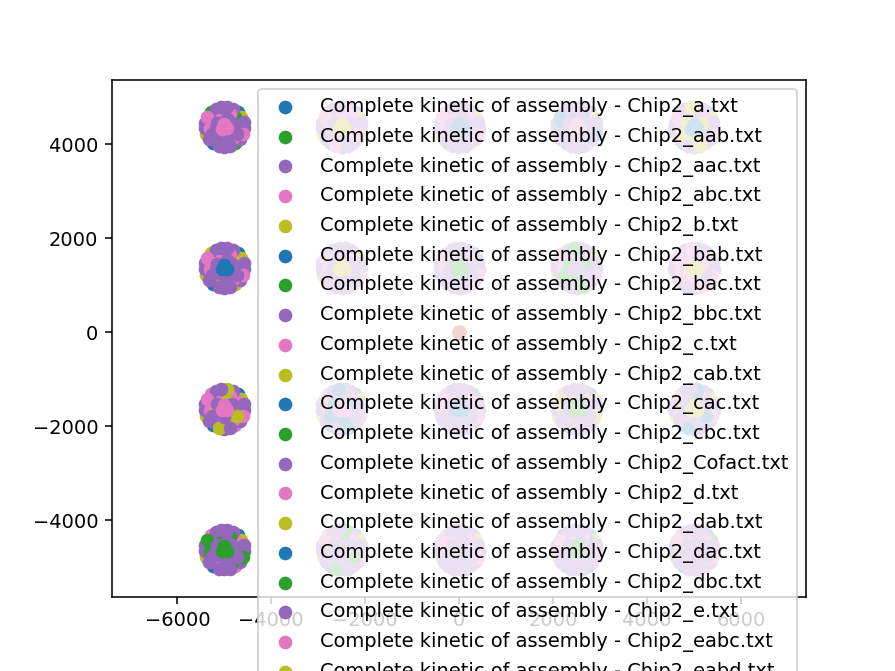

creating new file
done
writing to file: E:/Complete kinetic of assembly - Chip2/3spots/Complete kinetic of assembly - Chip2_aab.pattern
extracted points: 6
creating new file
done
writing to file: E:/Complete kinetic of assembly - Chip2/3spots/Complete kinetic of assembly - Chip2_aac.pattern
extracted points: 6
creating new file
done
writing to file: E:/Complete kinetic of assembly - Chip2/3spots/Complete kinetic of assembly - Chip2_abc.pattern
extracted points: 6
creating new file
done
writing to file: E:/Complete kinetic of assembly - Chip2/3spots/Complete kinetic of assembly - Chip2_b.pattern
extracted points: 102
creating new file
done
writing to file: E:/Complete kinetic of assembly - Chip2/3spots/Complete kinetic of assembly - Chip2_bab.pattern
extracted points: 6
creating new file
done
writing to file: E:/Complete kinetic of assembly - Chip2/3spots/Complete kinetic of assembly - Chip2_bac.pattern
extracted points: 6
creating new file
done
writing to file: E:/Complete kinetic of a

In [43]:
#print(filesSelector.files)
for file in filesSelector.files:
    out_file_name = file[:-4]+'.pattern'
    print ('writing to file: '+ out_file_name)
    writefile(file,out_file_name)
